In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")

noShow = pds.read_csv('No-show-Issue-Comma-300k.csv')
print(noShow.head())

   Age Gender AppointmentRegistration        ApointmentData DayOfTheWeek  \
0   19      M    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24      F    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4      F    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5      M    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38      M    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

    Status  Diabetes  Alcoolism  HiperTension  Handcap  Smokes  Scholarship  \
0  Show-Up         0          0             0        0       0            0   
1  Show-Up         0          0             0        0       0            0   
2  Show-Up         0          0             0        0       0            0   
3  Show-Up         0          0             0        0       0            0   
4  Show-Up         0          0             0        0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0             0       

## Renaming columns in Order 

In [2]:
noShow.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

print(noShow.columns)

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')


In [3]:
noShow.AppointmentRegistration = noShow.AppointmentRegistration.apply(np.datetime64)
noShow.AppointmentData = noShow.AppointmentData.apply(np.datetime64)
noShow.AwaitingTime = noShow.AwaitingTime.apply(abs)

print(noShow.AppointmentRegistration.head())
print(noShow.AppointmentData.head())
print(noShow.AwaitingTime.head())

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2015-01-14
1   2015-08-19
2   2014-02-18
3   2014-08-07
4   2015-10-27
Name: AppointmentData, dtype: datetime64[ns]
0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


## Viewing Statistics in time Series 

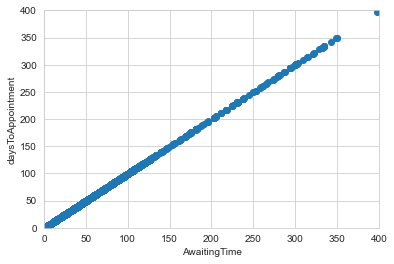

In [4]:


daysToAppointment = noShow.AppointmentData - noShow.AppointmentRegistration
daysToAppointment = daysToAppointment.apply(lambda x: x.total_seconds() / (3600 * 24))
plt.scatter(noShow.AwaitingTime, daysToAppointment)
plt.axis([0, 400, 0, 400])
plt.xlabel('AwaitingTime')
plt.ylabel('daysToAppointment')
plt.show()



In [5]:

def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

noShow['HourOfTheDay'] = noShow.AppointmentRegistration.apply(calculateHour)



In [6]:
print('Age:',sorted(noShow.Age.unique()))
print('Gender:',noShow.Gender.unique())
print('DayOfTheWeek:',noShow.DayOfTheWeek.unique())
print('Status:',noShow.Status.unique())
print('Diabetes:',noShow.Diabetes.unique())
print('Alchoholism:',noShow.Alchoholism.unique())
print('Hypertension:',noShow.Hypertension.unique())
print('Handicap:',noShow.Handicap.unique())
print('Smokes:',noShow.Smokes.unique())
print('Scholarship:',noShow.Scholarship.unique())
print('Tuberculosis:',noShow.Tuberculosis.unique())
print('Sms_Reminder:',noShow.Sms_Reminder.unique())
print('AwaitingTime:',sorted(noShow.AwaitingTime.unique()))
print('HourOfTheDay:', sorted(noShow.HourOfTheDay.unique()))

Age: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 108, 113]
Gender: ['M' 'F']
DayOfTheWeek: ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status: ['Show-Up' 'No-Show']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [0 1]
Handicap: [0 1 2 3 4]
Smokes: [0 1]
Scholarship: [0 1]
Tuberculosis: [0 1]
Sms_Reminder: [0 1 2]
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [7]:
noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 95)]

## Checking for Outliers 

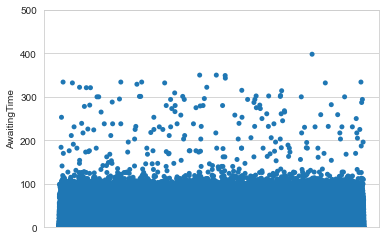

In [8]:
sns.stripplot(data = noShow, y = 'AwaitingTime', jitter = True)
plt.ylim(0, 500)
plt.show()



In [9]:
noShow = noShow[noShow.AwaitingTime < 350]

In [10]:
def probStatus(dataset, group_by):
    df = pds.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
    df['probShowUp'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'probShowUp']]


# Estimating Probabilistic values using different feature values 

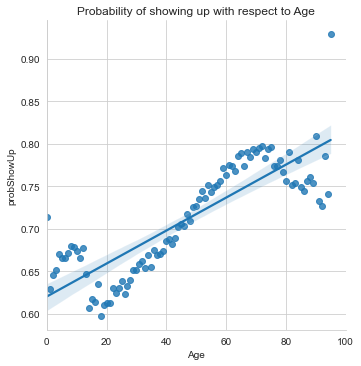

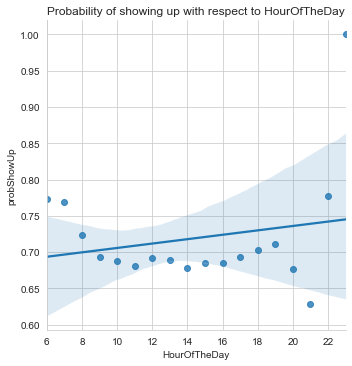

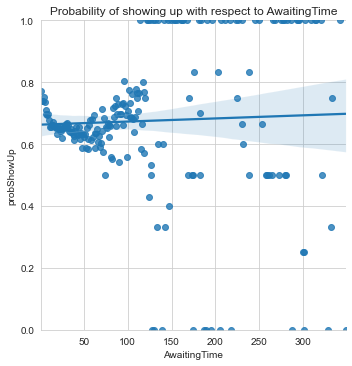

In [11]:
sns.lmplot(data = probStatus(noShow, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

sns.lmplot(data = probStatus(noShow, 'HourOfTheDay'), x = 'HourOfTheDay', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to HourOfTheDay')
plt.show()

sns.lmplot(data = probStatus(noShow, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to AwaitingTime')
plt.ylim(0, 1)
plt.show()



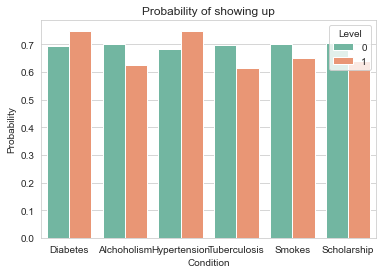

In [12]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in noShow[item].unique():
            row = {'Condition': item}
            total = len(noShow[noShow[item] == level])
            n = len(noShow[(noShow[item] == level) & (noShow.Status == 'Show-Up')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pds.DataFrame(rows)

sns.barplot(data = probStatusCategorical(['Diabetes', 'Alchoholism', 'Hypertension',
                                         'Tuberculosis', 'Smokes', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()



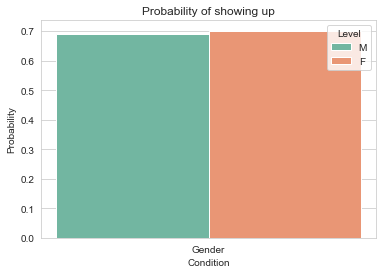

In [13]:
sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

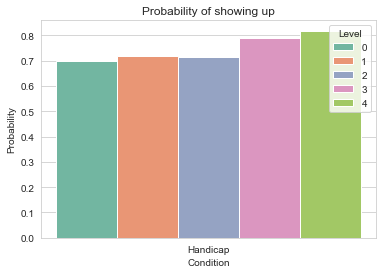

In [14]:
sns.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

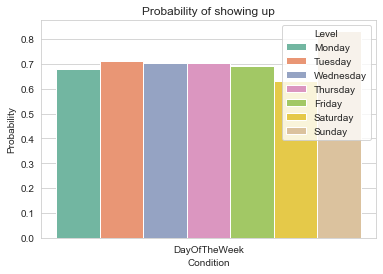

In [15]:
sns.barplot(data = probStatusCategorical(['DayOfTheWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2',
           hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                       'Saturday', 'Sunday'])
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()



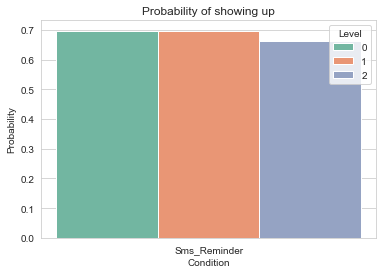

In [16]:
sns.barplot(data = probStatusCategorical(['Sms_Reminder']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

# Bayesian Analysis 

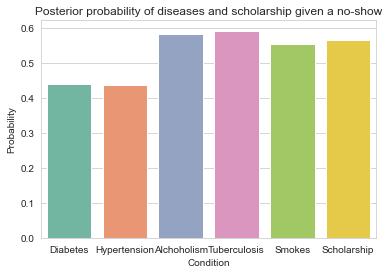

In [17]:
def posteriorNoShow(condition):
    levels = list(noShow[condition].unique())
    if condition not in ['DayOfTheWeek', 'Gender']: 
        levels.remove(0)
    rows = []
    for level in levels:
        p = len(noShow[noShow[condition] == level]) / len(noShow)
        p1 = len(noShow[(noShow[condition] == level) & (noShow.Status == 'No-Show')]) / len(noShow[noShow.Status == 'No-Show'])
        p2 = len(noShow[(noShow[condition] == level) & (noShow.Status == 'Show-Up')]) / len(noShow[noShow.Status == 'Show-Up'])
        if len(levels) > 1:
            rows.append({'Levels': level, 
                         'Probability': (p * p1) / (p * p1 + p * p2)})
        else:
            rows.append({'Condition': condition,
                         'Probability': (p * p1) / (p * p1 + p * p2)})
    return rows
    
tuples = []
tuples.extend(posteriorNoShow('Diabetes'))
tuples.extend(posteriorNoShow('Hypertension'))
tuples.extend(posteriorNoShow('Alchoholism'))
tuples.extend(posteriorNoShow('Tuberculosis'))
tuples.extend(posteriorNoShow('Smokes'))
tuples.extend(posteriorNoShow('Scholarship'))

sns.barplot(data = pds.DataFrame(tuples)[['Condition', 'Probability']], 
            x = 'Condition', y = 'Probability', palette = 'Set2')
plt.title('Posterior probability of diseases and scholarship given a no-show')
plt.ylabel('Probability')
plt.show()

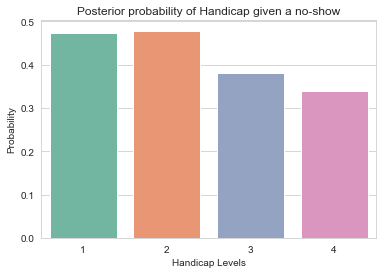

In [18]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('Handicap')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
plt.xlabel('Handicap Levels')
plt.ylabel('Probability')
plt.title('Posterior probability of Handicap given a no-show')
plt.show()



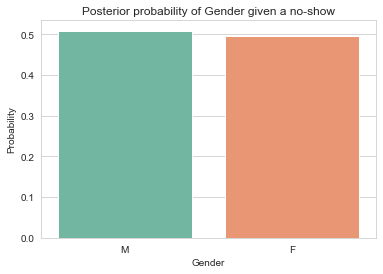

In [19]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('Gender')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.title('Posterior probability of Gender given a no-show')
plt.show()

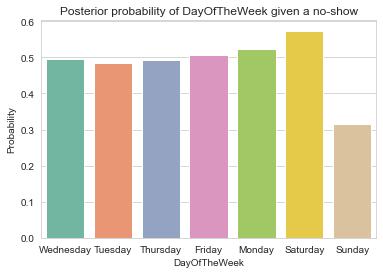

In [20]:
sns.barplot(data = pds.DataFrame(posteriorNoShow('DayOfTheWeek')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
plt.xlabel('DayOfTheWeek')
plt.ylabel('Probability')
plt.title('Posterior probability of DayOfTheWeek given a no-show')
plt.show()

# PREDICTION 

## Predicting if the patient will show up 

In [21]:
def dayToNumber(day):
    if day == 'Monday': 
        return 0
    if day == 'Tuesday': 
        return 1
    if day == 'Wednesday': 
        return 2
    if day == 'Thursday': 
        return 3
    if day == 'Friday': 
        return 4
    if day == 'Saturday': 
        return 5
    if day == 'Sunday': 
        return 6

noShow.Gender = noShow.Gender.apply(lambda x: 1 if x == 'M' else 0)
noShow.DayOfTheWeek = noShow.DayOfTheWeek.apply(dayToNumber)
noShow.Status = noShow.Status.apply(lambda x: 1 if x == 'Show-Up' else 0)


In [22]:
features_train = noShow[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alchoholism', 'Scholarship']].iloc[:296500]

labels_train = noShow.Status[:296500]

features_test = noShow[['Age', 'Diabetes','Hypertension', 'Tuberculosis', 'Smokes',
                         'Alchoholism', 'Scholarship']].iloc[296500:]

labels_test = noShow.Status[296500:]

In [23]:
def age_binning(df):
    import pandas as pd
    bins= [0,10,20,30,40,50,60,70,80,90,100]
    labels = ['Age<10','Age<20','Age<30','Age<40','Age<50','Age<60','Age<70','Age<80','Age<90','Age<100']
    Age = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df=df.drop(['Age'],axis=1)
    df["Age"]=Age  
    df=pd.concat([df,pd.get_dummies(df['Age'],drop_first=True)],axis=1)    
    df = df.drop (['Age'],axis=1)
    return df

features_train = age_binning(features_train)
features_test = age_binning(features_test)

In [25]:
features_test

,Diabetes,Hypertension,Tuberculosis,Smokes,Alchoholism,Scholarship,Age<20,Age<30,Age<40,Age<50,Age<60,Age<70,Age<80,Age<90,Age<100
296695,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296696,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296697,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
296698,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296699,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299996,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
299997,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
299998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Building the Model and Training 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB().fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        clf.predict(features_test)), 2) * 100, '%')

Accuracy: 71.0 %


In [38]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        model.predict(features_test)), 2) * 100, '%')

Accuracy: 71.0 %


In [41]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        model_log.predict(features_test)), 2) * 100, '%')

Accuracy: 71.0 %


In [42]:
from sklearn import tree

model_log = tree.DecisionTreeClassifier()
model_log.fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        model_log.predict(features_test)), 2) * 100, '%')

Accuracy: 71.0 %


In [28]:
y_pred = model.predict(features_test)
y_true = labels_test

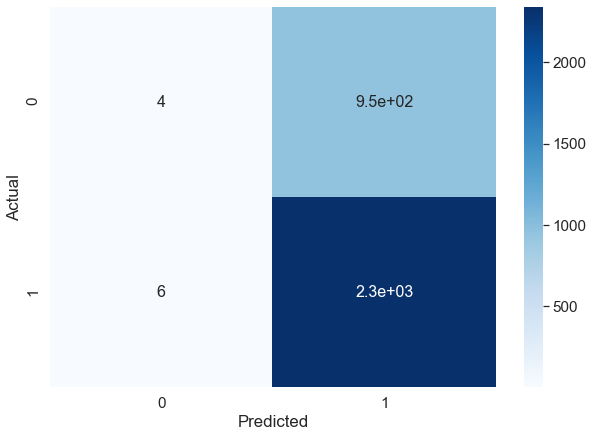

In [29]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_true, y_pred)
df_cm = pds.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [30]:
print(df_cm)

Predicted  0     1
Actual            
0          4   954
1          6  2339


In [31]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [32]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(features_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)